<a href="https://colab.research.google.com/github/ahmedabdurahim/Machine-learning/blob/main/StockPricePredictionModel1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


In [218]:
df = web.DataReader('SPY', data_source = 'yahoo', start = '2012-01-01', end = '2022-10-30')
#show the data

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,104.071899
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,104.235138
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,104.512688
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,104.243332
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,104.496346
...,...,...,...,...,...,...
2022-10-24,380.059998,373.109985,375.890015,378.869995,85436900.0,378.869995
2022-10-25,385.250000,378.670013,378.790009,384.920013,78846300.0,384.920013
2022-10-26,387.579987,381.350006,381.619995,382.019989,104087300.0,382.019989


In [219]:
df.shape

(2725, 6)

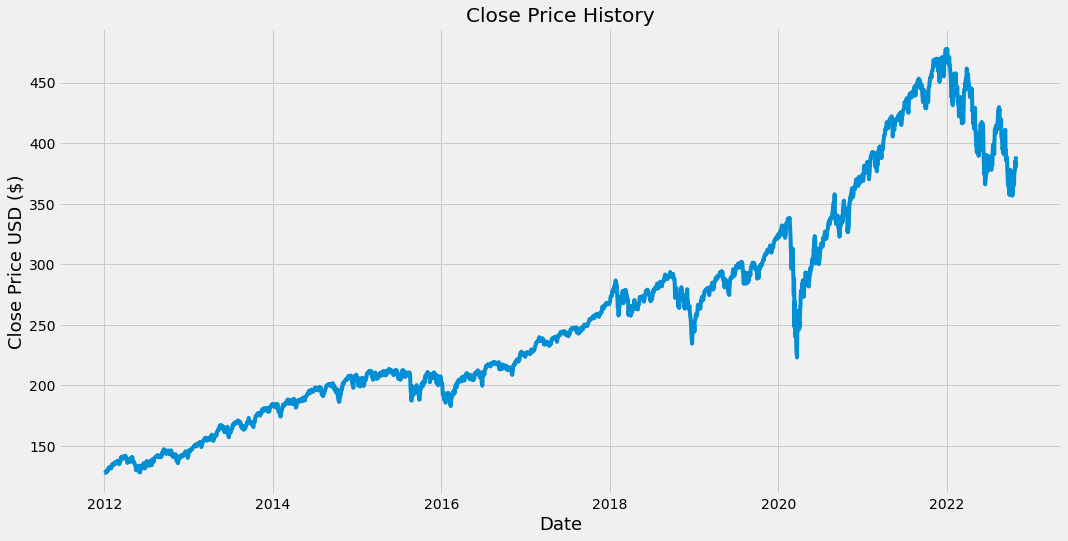

In [220]:
#Visualizing the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [221]:
# New DataFrame with only Close column
data = df.filter(['Close'])
#Convert the datafram to a numpy array
dataset = data.values
#Get no of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2180

In [222]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.00000000e+00],
       [5.71077220e-04],
       [1.54191285e-03],
       ...,
       [7.26763928e-01],
       [7.20938914e-01],
       [7.46751936e-01]])

In [223]:
#Create training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data to x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.00057108, 0.00154191, 0.00059964, 0.00148484,
       0.00465436, 0.00485422, 0.0057394 , 0.00382627, 0.00525398,
       0.00933727, 0.01130752, 0.01270665, 0.01173582, 0.01130752,
       0.01444847, 0.0125068 , 0.01233548, 0.0110505 , 0.01090776,
       0.01419149, 0.0147911 , 0.02010221, 0.01984523, 0.02081606,
       0.02195826, 0.02244368, 0.01958825, 0.02244368, 0.02195826,
       0.02015933, 0.02441393, 0.02544189, 0.02561321, 0.02435681,
       0.02607009, 0.02692668, 0.02758346, 0.02872562, 0.0271837 ,
       0.02921103, 0.02801176, 0.02641272, 0.02070187, 0.02338598,
       0.02724078, 0.0287542 , 0.02878274, 0.03586419, 0.03543589,
       0.03774878, 0.03654951, 0.03812   , 0.03694927, 0.03629253,
       0.03340852, 0.03469345, 0.04029011, 0.03903372, 0.03703493])]
[0.0363496074873465]

[array([0.        , 0.00057108, 0.00154191, 0.00059964, 0.00148484,
       0.00465436, 0.00485422, 0.0057394 , 0.00382627, 0.00525398,
       0.00933727, 0.01130752, 0.012

In [224]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [225]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2120, 60, 1)

In [226]:
#Build the Lstm Model

model = Sequential()
model.add(LSTM (50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [227]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [228]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2120/2120 [==============================] - 74s 33ms/step - loss: 7.4631e-04
Epoch 2/5
2120/2120 [==============================] - 58s 28ms/step - loss: 2.5362e-04
Epoch 3/5
2120/2120 [==============================] - 61s 29ms/step - loss: 1.9429e-04
Epoch 4/5
2120/2120 [==============================] - 57s 27ms/step - loss: 1.6336e-04
Epoch 5/5
2120/2120 [==============================] - 57s 27ms/step - loss: 1.6558e-04


In [229]:
#Create testing dataset
#Create new array containing scaled values from index 2104 to 2705
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [230]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [231]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [232]:
#Get models predicted value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


18/18 [==============================] - 1s 17ms/step


In [233]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

0.3494538193448968

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


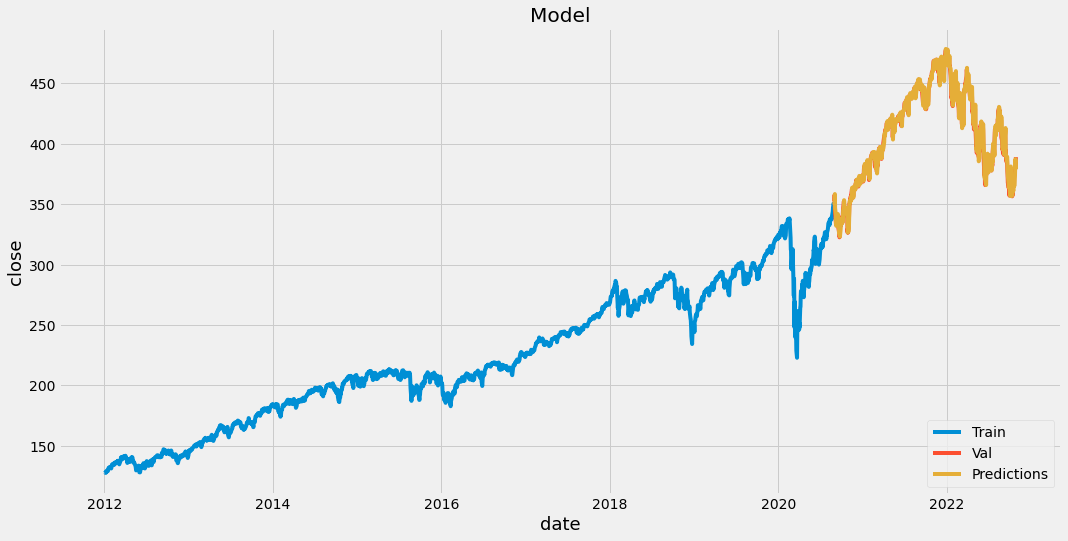

In [234]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize = 18)
plt.ylabel('close', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [235]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-09-01,352.600006,349.718964
2020-09-02,357.700012,352.451508
2020-09-03,345.390015,358.448853
2020-09-04,342.570007,346.782471
2020-09-08,333.209991,340.469879
...,...,...
2022-10-24,378.869995,373.519714
2022-10-25,384.920013,381.083557
2022-10-26,382.019989,387.297913


In [285]:
Quote = ['MSFT','AAPL','TSLA','SPY']
for i in range(len(Quote)):
  EndDate = '2021-11-03'
  apple_quote = web.DataReader(Quote[i], data_source = 'yahoo', start = '2012-01-01', end = EndDate)
  new_df = apple_quote.filter(['Close'])
  last_60_days = new_df[-60:].values
  last_60_days_scaled = scaler.transform(last_60_days)
  X_test = []
  X_test.append(last_60_days_scaled)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  pred_price = model.predict(X_test)
  pred_price = scaler.inverse_transform(pred_price)
  print("Prediction for " + Quote[i] + " on " + str(EndDate) + " close is " + str(pred_price[0,0]))


1/1 [==============================] - 0s 33ms/step
Prediction for MSFT on 2021-11-03 close is 333.62262
1/1 [==============================] - 0s 37ms/step
Prediction for AAPL on 2021-11-03 close is 148.4952
1/1 [==============================] - 0s 38ms/step
Prediction for TSLA on 2021-11-03 close is 401.47116
1/1 [==============================] - 0s 26ms/step
Prediction for SPY on 2021-11-03 close is 465.22195


In [286]:
for i in range(len(Quote)):
  apple_quote2 = web.DataReader(Quote[i], data_source = 'yahoo', start = EndDate, end = EndDate)
  print(str(Quote[i]) + " " + str(apple_quote2['Close']))

MSFT Date
2021-11-03    334
Name: Close, dtype: int64
AAPL Date
2021-11-03    151.490005
Name: Close, dtype: float64
TSLA Date
2021-11-03    404.619995
Name: Close, dtype: float64
SPY Date
2021-11-03    464.720001
Name: Close, dtype: float64
